In [90]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
train_values = pd.read_csv( 'train_values.csv', index_col='building_id')
train_labels = pd.read_csv( 'train_labels.csv', index_col='building_id')

In [153]:
superestructures = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rf = RandomForestClassifier(random_state=2021)

In [154]:
rf.fit(train_values[superestructures], train_labels.values.ravel())

RandomForestClassifier(random_state=2021)

In [155]:
rf.feature_importances_

array([0.11087213, 0.24814224, 0.06244005, 0.03015171, 0.08679662,
       0.1561809 , 0.0585955 , 0.04264239, 0.07171384, 0.11541968,
       0.01704496])

In [156]:
superestructures = ['adobe_mud', 'mud_mortar_stone',
       'stone_flag',
       'cement_mortar_stone',
       'mud_mortar_brick',
       'cement_mortar_brick', 'timber',
       'bamboo', 'rc_non_engineered',
       'rc_engineered', 'other']

In [157]:
df = pd.DataFrame(rf.feature_importances_, index=superestructures)
df.sort_values(0, ascending=False, inplace=True)

Text(0.5, 1.0, 'Feature importance de las superestrucuturas en el Random Forest')

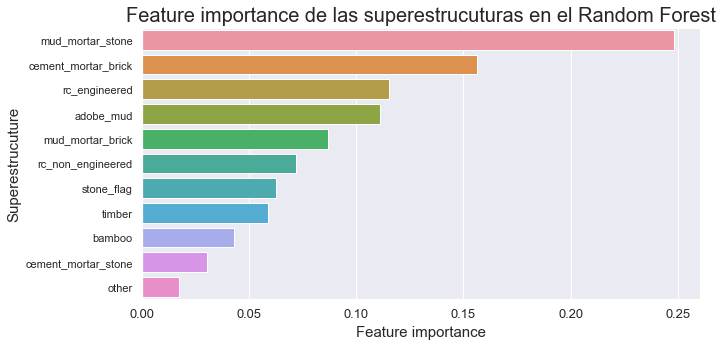

In [158]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.barplot(data=df, x=df[0], y=df.index, orient='h')
plt.xlabel('Feature importance', fontsize=15)
plt.ylabel("Superestrucuture", fontsize=15)
plt.xticks(fontsize=13)
plt.title('Feature importance de las superestrucuturas en el Random Forest', fontsize=20)

In [142]:
train_values['hasnt_secondary'] = train_values['has_secondary_use'] != True

In [143]:
secondary_uses =  ['has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other', "hasnt_secondary"]

In [144]:
secondary_uses_s =  ['agriculture', 'hotel',
       'rental', 'institution',
       'school', 'industry',
       'health_post', 'gov_office',
       'police', 'other', 'no_secondary_use']

In [145]:
rf1 = RandomForestClassifier(random_state=2021)
rf.fit(train_values[secondary_uses], train_labels.values.ravel())

RandomForestClassifier(random_state=2021)

In [146]:
df = pd.DataFrame(rf.feature_importances_, index=secondary_uses_s)
df.sort_values(0, ascending=False, inplace=True)

In [80]:
rf.feature_importances_

array([0.12496209, 0.44397969, 0.3323923 , 0.04036574, 0.00791837,
       0.00706361, 0.00447832, 0.00472452, 0.000715  , 0.03340035])

Text(0.5, 1.0, 'Feature importance de los usos secundarios en el Random Forest')

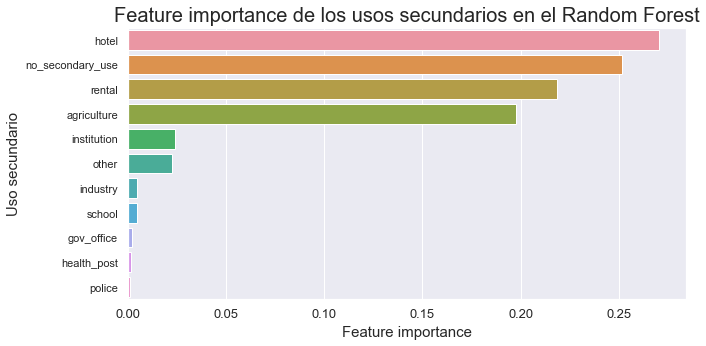

In [150]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.barplot(data=df, x=df[0], y=df.index, orient='h')
plt.xlabel('Feature importance', fontsize=15)
plt.ylabel("Uso secundario", fontsize=15)
plt.xticks(fontsize=13)
plt.title('Feature importance de los usos secundarios en el Random Forest', fontsize=20)